# Heart Disease Classification

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

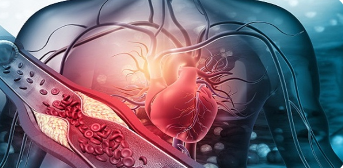

# About Dataset
<!-- Cardiovascular illnesses (CVDs) are the major cause of death worldwide.

The size of the dataset is 1319 samples, which have nine fields, where eight fields are for input fields and one field for an output field. Age, gender(0 for Female, 1 for Male) ,heart rate (impulse), systolic BP (pressurehight), diastolic BP (pressurelow), blood sugar(glucose), CK-MB (kcm), and Test-Troponin (troponin) are representing the input fields, while the output field pertains to the presence of heart attack (class), which is divided into two categories (negative and positive) negative refers to the absence of a heart attack, while positive refers to the presence of a heart attack.  -->

In [2]:
# Age:  Refers to the number of years a person has lived; it is a critical factor in assessing health risks, 
# including heart-related conditions, as risks often increase with age.
# gender : (0 for Female, 1 for Male)
# # Heart Rate (Impluse): The number of times the heart beats per minute, indicating cardiovascular activity.
# # Systolic BP (Pressurehigh): The pressure in the arteries when the heart contracts and pumps blood.
# # Diastolic BP (Pressurelow): The pressure in the arteries when the heart is at rest between beats.
# # Blood Sugar (Glucose): The amount of glucose present in the blood, crucial for energy and metabolism.
# # CK-MB (KCM): An enzyme found in the heart muscle; elevated levels indicate heart muscle damage.
# # Test-Troponin (Troponin): A protein released into the blood when the heart muscle is damaged, a key marker for diagnosing heart attacks.

# 1. Load & Data Acquisition

In [40]:
df = pd.read_csv("Heart Attack.csv")
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


# 2. Data Preprocessing

In [41]:
# View the first 5 rows of the dataset
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [42]:
# Check for missing values
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [43]:
# summary of the df
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [44]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


# EDA (Exploratory Data Analysis)

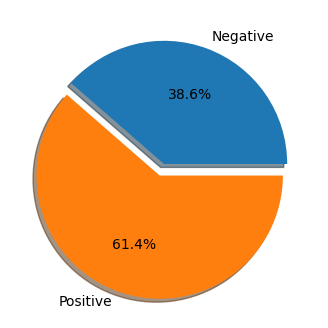

In [45]:
fig = plt.figure(figsize =(15, 4))

plt.pie(df[['class']].groupby('class').size(), labels =['Negative', 'Positive'], explode=(0, 0.1), autopct='%1.1f%%', shadow=True)

plt.show()

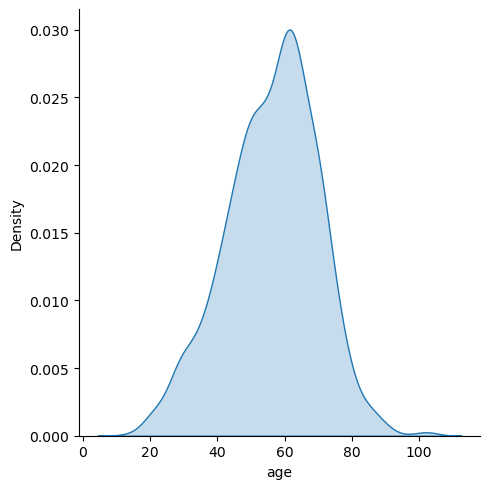

In [46]:
sns.displot(data = df,x = 'age',kind = 'kde',fill = True)

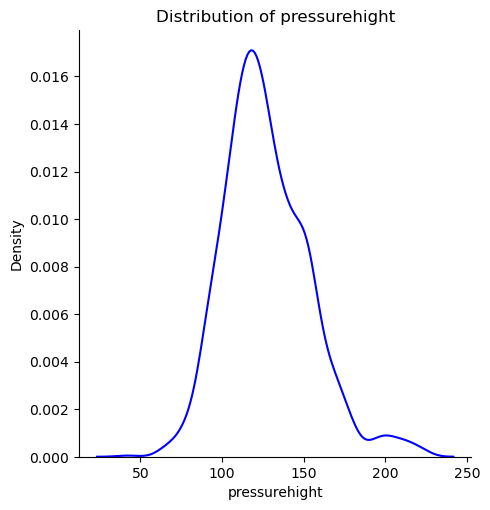

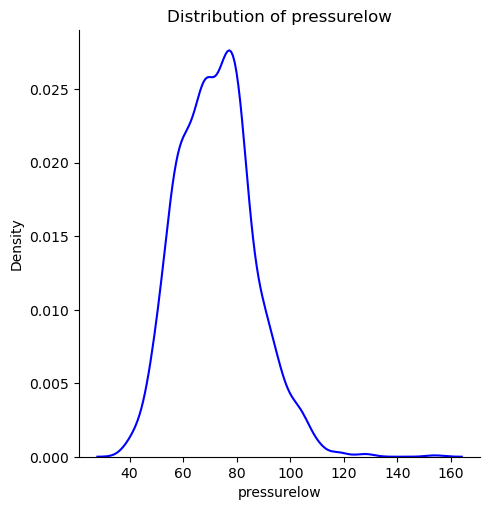

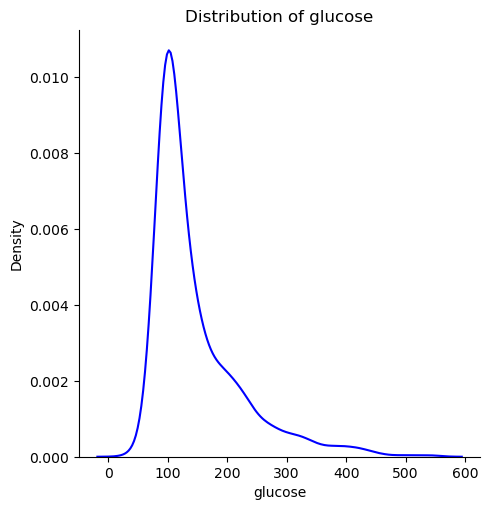

In [47]:
columns = df.columns[3:6]

for col in columns:
    sns.displot(df[col], kind = 'kde', color='blue')  
    plt.title(f'Distribution of {col}')  
    plt.xlabel(col)                      
    plt.show() 

# Outliers Handling

<Axes: ylabel='age'>

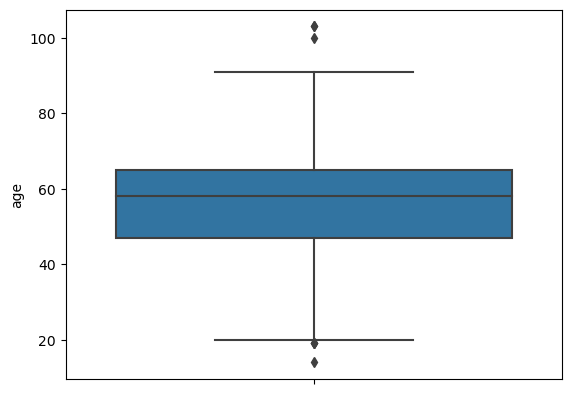

In [48]:
sns.boxplot(data = df,y = 'age')

In [62]:
# Function to remove outliers using the IQR method
def remove_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:  # Numerical columns only
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the dataset
df = remove_outliers(df)

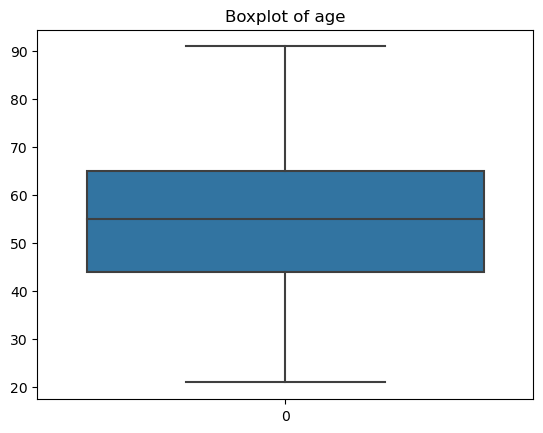

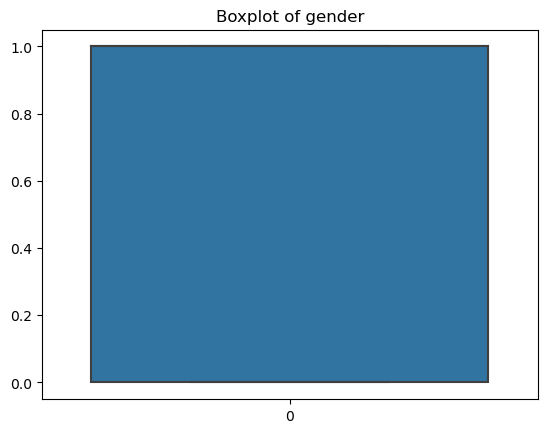

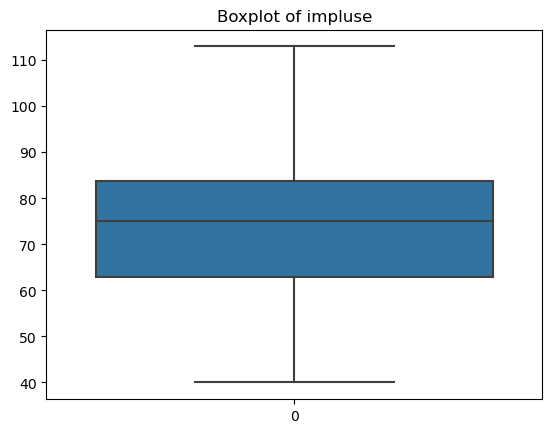

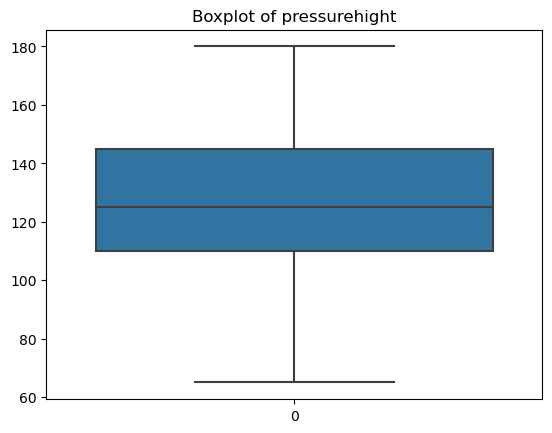

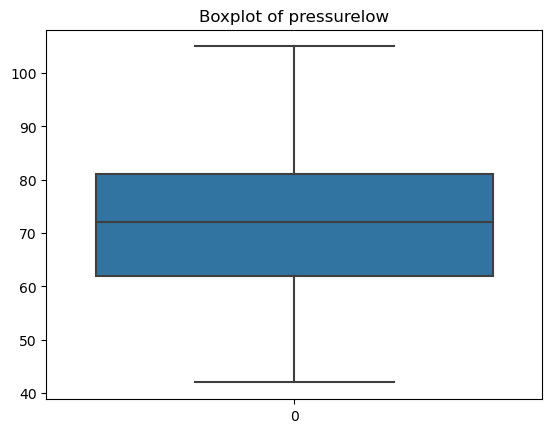

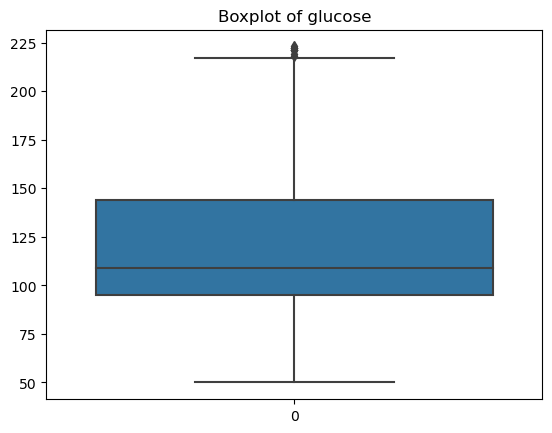

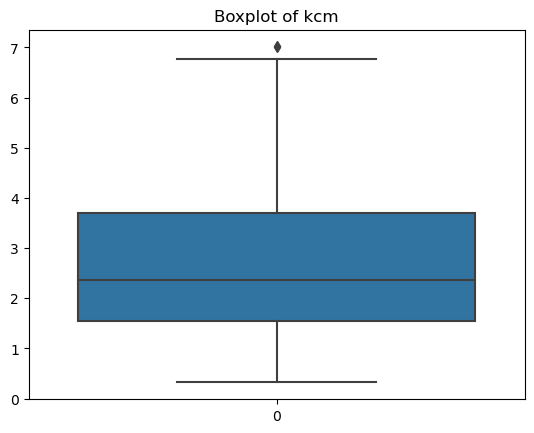

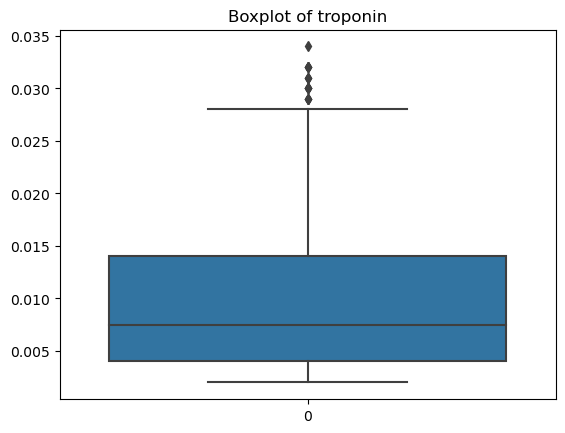

In [73]:
def Boxplot(df):
    for column in df.select_dtypes(include=['number']).columns:  
        sns.boxplot(df[column])
        plt.title(f"Boxplot of {column}")
        plt.show()
        
# Call the function
Boxplot(df)

# Feature Engineering

In [89]:
# Initialize StandardScaler
scaler = StandardScaler()

# Select feature columns to scale
feature_columns = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', ]

# Apply StandardScaler
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [79]:
# Separate features (X) and target (y)
X = df.drop(columns=["class"])
y = df["class"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(452, 8)
(114, 8)
(452,)
(114,)


# Build the model

In [84]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [85]:
#  Make predictions
y_pred = model.predict(X_test)

In [90]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
1253,positive,positive
1201,positive,positive
541,negative,negative
1208,positive,positive
1133,negative,negative
...,...,...
197,negative,negative
1197,negative,negative
1002,negative,negative
68,negative,negative


In [86]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


In [87]:
# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.96      0.94        77
    positive       0.91      0.81      0.86        37

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114




Confusion Matrix:


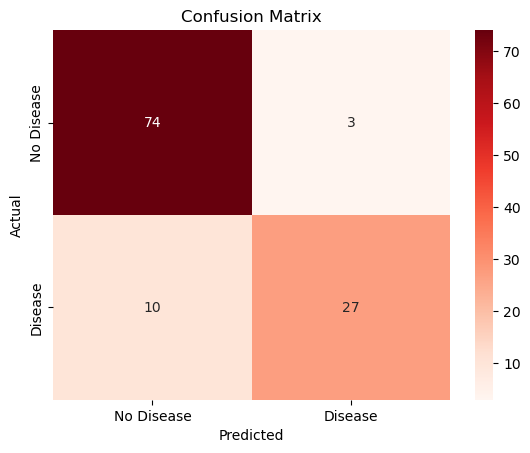

In [144]:

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
nb = GaussianNB()

nb.fit(X_train,y_train)

GaussianNB()

In [118]:
y_pred = nb.predict(X_test)

In [121]:
print("\nNaive Bayes Model")
print("Accuracy: ",accuracy_score(y_test,y_pred))


Naive Bayes Model
Accuracy:  0.9210526315789473


# Random Forest 

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model

rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [128]:
y_pred = rf_model.predict(X_test)

In [133]:
print("\nRandom Forest Classifier")
print("Accuracy: ",accuracy_score(y_test,y_pred))


Random Forest Classifier
Accuracy:  0.9736842105263158


# Support Vector Classiffier

In [134]:
from sklearn.svm import SVC

In [135]:
# Initialize Support Vector Machine classifier
svm_model = SVC(kernel='linear', random_state=42)  # 'linear' kernel for linear SVM

svm_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [138]:
y_pred = svm_model.predict(X_test)

In [140]:
print("\nSupport Vector Classifier")
print("Accuracy: ",accuracy_score(y_test,y_pred))


Support Vector Classifier
Accuracy:  0.9298245614035088


In [115]:
def predict_heart_disease():
    print("Please enter the following details:")

    # Step 1: Taking input from the user
    age = int(input("Enter age: "))
    gender = int(input("Enter Gender: "))
    impluse = float(input("Enter impluse: "))
    pressurehight = float(input("Enter pressurehight: "))
    pressurelow = float(input("Enter pressurelow: "))
    glucose = float(input("Enter Glucose: "))
    kcm = float(input("Enter kcm: "))
    troponin = float(input("Enter troponin: "))
    
    # Step 2: Create a feature vector from the user input
    input_data = np.array([[age, gender, impluse, pressurehight, pressurelow, glucose,
       kcm, troponin]])

    # Step 3: Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Step 4: Use the trained model to predict
    prediction = model.predict(input_data_scaled)[0]

    # Step 5: Output the result
    print(f"\nPredicted Class: {prediction}")

# Call the function
predict_heart_disease()

Please enter the following details:
Enter age: 90
Enter Gender: 0
Enter impluse: 25
Enter pressurehight: 120
Enter pressurelow: 80
Enter Glucose: 200
Enter kcm: 0.2
Enter troponin: 0.01

Predicted Class: negative


In [141]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)  # Assuming you have training data
    y_pred = svm_model.predict(X_test)
    print(f"Accuracy with {kernel} kernel: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy with linear kernel: 92.98%
Accuracy with poly kernel: 88.60%
Accuracy with rbf kernel: 94.74%
Accuracy with sigmoid kernel: 88.60%
